# Исследование надежности заемщиков


Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выведим первые 20 строчек датафрейма `data` на экран.

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведим основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведим количество пропущенных значений для каждого столбца

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Отрицательное количество дней трудового стажа в столбце `days_employed` - артефакт. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [7]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведим медианное значение трудового стажа `days_employed` в днях.

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

Выведим перечень уникальных значений столбца `children`.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Выведим перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [44]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их

In [15]:
data.duplicated().sum()

54

In [16]:
data = data.drop_duplicates()

Обработаем неявные дубликаты в столбце `education`. Приведим их к нижнему регистру.

In [17]:
data['education'] = data['education'].str.lower()

/tmp/ipykernel_48/3990672150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = data['education'].str.lower()


### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

/tmp/ipykernel_48/4017745142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income_category'] = data['total_income'].apply(categorize_income)


Выведим на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.

Используем функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определитм какие подстроки помогут вам правильно определить категорию.

In [1]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

/tmp/ipykernel_48/1505626498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purpose_category'] = data['purpose'].apply(categorize_purpose)


## Исследуем данные

Проверим есть ли зависимость между количеством детей и возвратом кредита в срок

In [23]:
#функция - создает новый df с необходимыми для анализа данными из общего df
def get_pivot_table(df, index, columns, values):
    #создаем таблицу с количеством просроченных кредитов в разрезе категорий 
    new_df = df.pivot_table(index=index, columns=columns, values=values, aggfunc='count')
    #удаляем мультииндекс в таблице
    new_df = new_df.reset_index()
    #переименновыеваем столбцы 0 - 'debt_false', 1 - 'debt_true'
    new_df.rename(columns={0 : 'debt_false', 1 : 'debt_true'}, inplace=True)
    return new_df

In [24]:
#уникальные значение столбца с количеством детей
print("Список уникальных значение столбца 'children' -", data['children'].unique())
#уникальные значение столца наличие просроченной задолженности по кредитам
print("Список уникальных значение столбца 'debt' -", data['debt'].unique())

Список уникальных значение столбца 'children' - [1 0 3 2 4 5]
Список уникальных значение столбца 'debt' - [0 1]


In [25]:
#таблица с количеством кредитов с просрочкой и без просрочки в разрезе количества детей
#6 категорий в зависимости от количества детей
data_pivot = get_pivot_table(data, 'children', 'debt', 'purpose')
data_pivot

debt,children,debt_false,debt_true
0,0,13044.0,1063.0
1,1,4365.0,444.0
2,2,1858.0,194.0
3,3,303.0,27.0
4,4,37.0,4.0
5,5,9.0,NaN


In [26]:
#в таблице есть пустые данные NaN, проверим это 0 кредитов с просрочкой или другая причина
print("Количество кредитов в категории 5 детей -", len(data.loc[(data['children'] == 5), 'debt']), 'кредитов')

Количество кредитов в категории 5 детей - 9 кредитов


In [27]:
#общее количество кредитов с 5 детьми 9, меняем NaN на 0, т.к. в той категории нет просрочек
data_pivot = data_pivot.fillna(0.0)
data_pivot

debt,children,debt_false,debt_true
0,0,13044.0,1063.0
1,1,4365.0,444.0
2,2,1858.0,194.0
3,3,303.0,27.0
4,4,37.0,4.0
5,5,9.0,0.0


In [28]:
#функция - добавляет в df с необходимые для анализа столбцы
def add_columns_to_table(df):
    #добавляем необходимые для анализа столбцы
    #общее количество кредитов в разрезе категорий
    df['total_loans'] = df['debt_false'] + df['debt_true'] 
    #доля кредитов в разрезе категорий
    df['share_loans'] = df['total_loans'] / df['total_loans'].sum()
    #процент просрочки от общего количества кредитов по категориям
    df['debt_percent'] = round(df['debt_true'] / df['total_loans'] * 100, 2)

In [29]:
#добавим столбец с общим количеством кредитов в разрезе количества детей
add_columns_to_table(data_pivot)
data_pivot

debt,children,debt_false,debt_true,total_loans,share_loans,debt_percent
0,0,13044.0,1063.0,14107.0,0.660811,7.54
1,1,4365.0,444.0,4809.0,0.225267,9.23
2,2,1858.0,194.0,2052.0,0.096121,9.45
3,3,303.0,27.0,330.0,0.015458,8.18
4,4,37.0,4.0,41.0,0.001921,9.76
5,5,9.0,0.0,9.0,0.000422,0.00


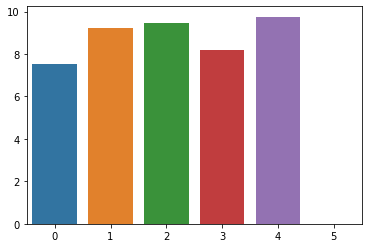

In [30]:
#визуализируем данные процента от общей задолженности по категориям
#по оси Х - количество детей, по оси Y -  доля в общем объеме
sns.barplot(x=list(data_pivot['children']), y=list(data_pivot['debt_percent']));

In [31]:
#общий процент просроченных кредитов от общего количества кредитов
print(
    'Просроченная задолженность по всем кредитам -', 
    round(data_pivot['debt_true'].sum() / data_pivot['total_loans'].sum() * 100, 2), 'процентов.'
)

Просроченная задолженность по всем кредитам - 8.11 процентов.


**Вывод:** 

В выборке распределение количества кредитов очень не равномерное, с наибольшим удельным весом в категории без детей - **66%** и с **0,004%** в категории с 5 детьми. В связи с очень низкой долей кредитов в категории с 5 детьми можно неучитывать 0-ой уровень просрочки. 

В остальных категориях разброс уровня просроченной задолженности не большой **0,5 - 2%** и не связан с количеством детей, только лишь категория без детей показывает долю просроченной задолженности ниже средней.

Согласно данным выборки прямой зависимости от количество детей и возрата кредитов в срок **нет**.

Проверим есть ли зависимость между семейным положением и возвратом кредита в срок

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
print("Уникальные значения столбца 'family_status' -", data['family_status'].unique())
print("Уникальные значения столбца 'family_status_id' -", data['family_status_id'].unique())

Уникальные значения столбца 'family_status' - ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
Уникальные значения столбца 'family_status_id' - [0 1 2 3 4]


In [33]:
#создаем таблицу с количеством просроченных кредитов в разрезе категорий статуса семейного положения
data_family_status = get_pivot_table(data, 'family_status', 'debt', 'family_status_id')
data_family_status

debt,family_status,debt_false,debt_true
0,Не женат / не замужем,2523,273
1,в разводе,1105,84
2,вдовец / вдова,888,63
3,гражданский брак,3761,385
4,женат / замужем,11339,927


In [34]:
#добовляем столбцы необходимые для анализа
add_columns_to_table(data_family_status)
data_family_status

debt,family_status,debt_false,debt_true,total_loans,share_loans,debt_percent
0,Не женат / не замужем,2523,273,2796,0.130972,9.76
1,в разводе,1105,84,1189,0.055696,7.06
2,вдовец / вдова,888,63,951,0.044547,6.62
3,гражданский брак,3761,385,4146,0.194210,9.29
4,женат / замужем,11339,927,12266,0.574574,7.56


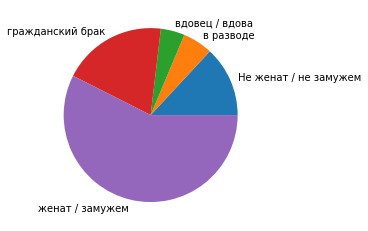

In [35]:
#визуализация доли количества кредитов в разрезе категорий
plt.pie(x=list(data_family_status['share_loans']), labels=list(data_family_status['family_status']))
plt.show();

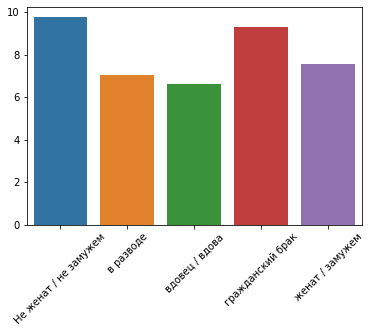

In [36]:
#визуализация процента просроченных кредитов в разрезе категорий 
#по оси Х - категория, по оси Y -  доля в общем объеме
sns.barplot(x=list(data_family_status['family_status']), y=list(data_family_status['debt_percent']))
plt.xticks(rotation=45);

**Вывод:** 

В выборке преобладает более половины всех кредитов в категории **"женат / замужем"** - **57%** и 2 категории **"вдовец / вдова"** и **"разведен"** составляют около **1%**.
Все **3 категории показывают, хорошую**, ниже общего уровня просрочки **8,11%**, динамику возрата кредита.
Категории **"гражданский брак" и "Не женат / не замужем"** показывают динамику по возрату кредитов хуже вышеперечисленных, превышаа среднюю более чем на **1%**.

Согласно данным выборки возврат кредита в срок **зависит от семейного положения**. Клиенты которые в были в браке либо находятся в браке на **1,5% - 2%** лучше возвращают кредит в срок, чем клиенты в гражанском браке либо холостые.

Проверим есть ли зависимость между уровнем дохода и возвратом кредита в срок

In [37]:
"""
Категории доходов клиентов:
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.
"""
#Создаем таблицу с количеством просроченных кредитов в зависимости от категории дохода
data_total_income = get_pivot_table(data, 'total_income_category', 'debt', 'total_income')
data_total_income

debt,total_income_category,debt_false,debt_true
0,A,23,2
1,B,4660,354
2,C,14585,1353
3,D,328,21
4,E,20,2


In [38]:
#добовляем столбцы необходимые для анализа
add_columns_to_table(data_total_income)
data_total_income

debt,total_income_category,debt_false,debt_true,total_loans,share_loans,debt_percent
0,A,23,2,25,0.001171,8.00
1,B,4660,354,5014,0.234870,7.06
2,C,14585,1353,15938,0.746580,8.49
3,D,328,21,349,0.016348,6.02
4,E,20,2,22,0.001031,9.09


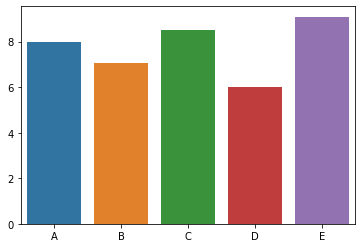

In [39]:
#визуализация процента просроченных кредитов в разрезе категорий 
#по оси Х - категория, по оси Y -  доля в общем объеме
sns.barplot(x=list(data_total_income['total_income_category']), y=list(data_total_income['debt_percent']));

**Вывод:**

Согласно данным выборки основное количество клиентов составляют средним-медианным доходом от **50001–200000** руб. - **74%**, у этой категории близкиц к среднему показатель просрочки, клиенты с самым высоким - **более 1000000 руб.**, и низкин доходом **до 30000 руб.**, составляют **менее 1%**, и у них разный процент уровня просрочки по кредитам **9,09%** у клиентов с самым низким доходом и **8%** у клиентов с высоким доходом. 

Волонтильность процента просроченной задолженности относительно **среднего уровня просрочки 8,11%**, говорит о **зависимости** между возвратом кредита в срок и уровнем дохода клиента. Где наиболее благонадежные клиенты, с доходом **от 30000 до 50000 руб**. с просрочкой **6,02%**, и наименее надежные клиенты с самым **низким доходом**.   

Проверим как разные цели кредита влияют на его возврат в срок

In [40]:
#Создаем таблицу с количеством просроченных кредитов в разрезе целей кредита
data_purpose_category = get_pivot_table(data, 'purpose_category', 'debt', 'purpose') 
data_purpose_category

debt,purpose_category,debt_false,debt_true
0,операции с автомобилем,3881,400
1,операции с недвижимостью,9974,780
2,получение образования,3620,369
3,проведение свадьбы,2141,183


In [41]:
#Добавляем дополнительные столбцы в таблицу, необходимые для анализа
add_columns_to_table(data_purpose_category)
data_purpose_category

debt,purpose_category,debt_false,debt_true,total_loans,share_loans,debt_percent
0,операции с автомобилем,3881,400,4281,0.200534,9.34
1,операции с недвижимостью,9974,780,10754,0.503747,7.25
2,получение образования,3620,369,3989,0.186856,9.25
3,проведение свадьбы,2141,183,2324,0.108863,7.87


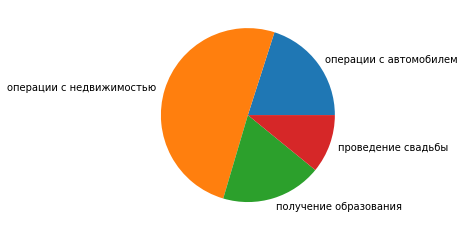

In [42]:
#визуализация доли количества кредитов в разрезе категорий
plt.pie(list(data_purpose_category['share_loans']), labels=list(data_purpose_category['purpose_category']))
plt.show();

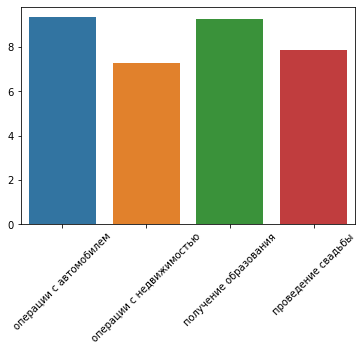

In [43]:
#визуализация процента просроченных кредитов в разрезе категорий 
#по оси Х - категория, по оси Y -  доля в общем объеме
sns.barplot(x=list(data_purpose_category['purpose_category']), y=list(data_purpose_category['debt_percent']))
plt.xticks(rotation=45);

**Вывод:** 

Согласно данным выборки категория **операции с недвижимостью** занимают нибольший удельный вес - **50%**, от всех кредитом и имеет самый низкий уровень просрочки, категория **проведение свадьбы** имеет наименьший удельный вес, но имеет так же уровень просрочки ниже **среднего 8,11%**. **Операции с автомобилями** и **получение образования** имеют примерно одинаковую долю в структуре выборки и примерно одинаковый процент просрочки выше среднего более 1%. 

В выборки остутвуют одинаковое количество данных в столбцах **days_employed** и **total_income**, возможные причины:
* Клиенты не захотели раскрывать информацию о своих доходах и стаже
* Возможно данный вопрос включили позже в анкету
* Возможна техническая ошибка
* Возможно пропуски случайные

## Общий вывод.


Данное исследование направленно на выявления факторов оказывающие влияние на погашение кредитов в срок, с целью предоставления информации для разработки моделей кредитного скоринга (модель позволяющая определить кредитоспособность клиентов, с целью обеспечения возратов кредитов в установленный срок)

Входные данные - выборка из 21525 клиентов в разрезе основных параметров, для проведения оценки их кредитоспособности, в т.ч. данные по наличию /отсутвия просроченной задолженности.

**Первоначальные гипотезы текущего исследования:**
* Гипотеза 1. Количество детей влияет на возврат кредита в срок;
* Гипотеза 2. Семейное положение влияет на возврат кредита в срок;
* Гипотеза 3. Уровень дохода влияет на возврат кредита в срок;
* Гипотеза 4. Цель кредитования оказывает влияние на возврат кредита в срок.

Согласно проведнному анализу предоставленной выборки, отдельные факторы влияют на возвращаемость кредитов в срок:

**Для сравнения уровня возвратов кредита в срок, необходимо ориентироваться на уровень невозвратов в срок по всей выборке - 8,11%**

*Гипотеза 1*

Не подтвердилась

Количество детей невлияет на возврат кредита в срок,т.к. разница уровня просроченной задолженности у клиентов с детьми отличается не значительно:
* 1 ребенок - 9,23%
* 2 ребенка - 9,45%
* 3 ребенка - 8,18%
* 4 ребенка - 9,76%
5 детей можно не рассматривать т.к. доля таких кредитов всего 0,04%.

Однако необходимо обратить внимание на то, что у клиентов без детей показатель лучше, чем у клиентов с детьми и составляет 7,54%, что ниже среднего значения по выборке, в отличие от показателей у клиентов с детьми.

Возможно изменение результатов при исследовании более полной выборки.

*Гипотеза 2*

Подтвердилась 

Семейное положение клиента влияет на его платежеспособность, клиенты которые в официальном браке и/или клиенты которые были в официальном браке имеют показатель возврата кредита в срок ниже среднего по выборке:
- женат/замужем 7,56%
- в разводе     7,06%
- вдовец/вдова  6,62%

В отличии от клиентов проживающие в гражданском браке, либо холостые, у них показатель выше среднего по выборке:
- гражданский брак    9,29%
- не женат/не замужем 9,76%

Клиенты которые в состоят или состояли в браке - наиболее дисциплинированная категория заемщиков.

*Гипотеза 3*

Подтвердилась частично

Уровень дохода влияет на возрат кредита в срок, клиенты с доходом 

Клиенты с доходм до 30000 р., имеют самый высокий уровень невозратов кредитов при низкой доли в структуре:
- 9.09% при доле 0,1% в структуре

Клиенты с доходом от 200000 до 1000000 р., и клиенты от 30000 до 500000 р. имеют показатель просрочки ниже среднего:
- от 30000 до 500000 р.   6.02%
- от 200000 до 1000000 р. 7,06%

Однако выборка в разрезе доходов не достаточная, чтоб делать однозначные выводы, т.к. при измененияя количества клиентов в категориях с низкой долей уровень невозратов может как повысится, так и уменшится

Для более точного анализа необходима полная выборка

*Гипотеза 4*

Подтвердилась

Анализ показателей по целям кредита явно показал 2 категории с ниже среднего уровнем невозврата кредитов:
* операции с недвижимостью - 7,25%
* проведение свадьбы - 7,78%

И 2 категории с худшим относительно среднего показателя по выборке результатом:
* операции с автомобилем - 9,34%
* получение образования - 9,25%

Данные результаты при относительно равномерной доле кредитов с 1 выбросом 50% по операциям с недвижимостью
Клиенты использующие кредит на покупку недвижимости или проведения свадьбы более благонадежные, чем клиенты покупающие автомобиль или получающие образование за счет кредита.

**Общие реккомендации:**

1. При принятии решения возможно использования данных по 2 и 4 подтвержденным Гипотезам, семейное положение и цели кредитования оказывают влияние на возрат кредитов в срокю
2. Количество клиентов в одном сегменте, но разными категориями сильно варьируются в общей доле, поэтому для получение более точной информации по 3 гипотезе необходимо дополнительная выборка.
